# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy

In [ ]:
def linan(first_line, second_line):
  a11, a12, b1 = map(float, first_line.split(' '))
  a21, a22, b2 = map(float, second_line.split(' '))
  
  matrix = numpy.array([[a11, a12], [a21, a22]])
  vector = numpy.array([[b1], [b2]])
  return numpy.linalg.solve(matrix, vector)

In [ ]:
first_line = input()
second_line = input()
solution = linan(first_line, second_line)

1 2 3
4 5 6


In [ ]:
print(round(float(solution[0]), 3), round(float(solution[1]), 3))

-1.0 2.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def get_matrix(n):
  matrix = numpy.zeros((n, n))
  matrix[0,:] = 1
  matrix[- 1,:] = 1
  matrix[:,0] = 1
  matrix[:,- 1] = 1
  return matrix

In [ ]:
n = int(input())

4


In [ ]:
get_matrix(n)

array([[1., 1., 1., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy import optimize

In [ ]:
def f(x):
  return (x + a) ** 2 - b

def g(x):
  return abs(f(x))

def find_minima(f):
  f_solution = optimize.minimize_scalar(f)
  if (f_solution.success == True):
    return round(f_solution.x, 3)
  else:
    return "find no minima"

In [ ]:
 a = float(input())
 b = float(input())

3
4


In [ ]:
second_min_g_bool = False

if f(find_minima(f)) < 0:
  second_min_g = 2 * find_minima(f) - find_minima(g)
  second_min_g_bool = True
  
print(find_minima(f), find_minima(g))

-3.0 -1.0


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_function(f, x_mins = None):
    x = range(-10, 10)
    y = list(map(f, x))

    plt.plot(x, y)
    plt.ylabel("Y")
    plt.xlabel("X")
    min = find_minima(f)
    if x_mins is None:
      plt.scatter(min, f(min), color = "green")
    else:
      for x in x_mins:
        plt.scatter(x, f(x), color = "green")

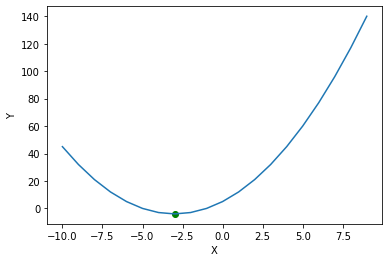

In [ ]:
plot_function(f)

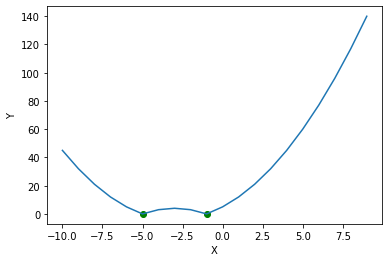

In [ ]:
if second_min_g_bool:
  plot_function(g, [second_min_g, find_minima(g)])
else:
  plot_function(g)

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

1. Рассмотрим броски отдельного человека: бросая монетку 10 раз подряд он может получить **1024** возможные комбинации орла и решки (так как всего возможно 2 элементарных исхода, орел или решка, и бросков всего 10: $ 2^{10} $). При этом есть всего две комбинации, при которых монета выпадает 10 раз подряд орлом или решкой. Таким образом, вероятность того, что у человека выпадет монета 10 раз подряд одной и той же стороной равна:
$ 2/1024 = 1/512 $.
Найдем вероятность того, что у человека при броске **НЕ** выпала 10 раз одна сторона. Такая вероятность равна:
$ 1 - 2/1024 = 1022/1024 $.
Для того, чтобы найти исходную вероятность, когда нужная комбинация выпала хотя бы у одного человека, воспользуемся фактом того, что *все возможные события = комбинация не выпала ни у кого + комбинация выпала хотя бы у одного человека*.
Тогда для 1000 человек имеем формулу:
$ 1 - (1022/1024)^{1000}$

In [ ]:
print(round((1-(1022/1024)**1000) * 100, 3), '%')

85.844 %


2. По аналогии с пунктом 1, найдем вероятность того, что у человека 8 раз подряд выпадет одна сторона монеты. Таких вариантов всего 10: ОООООООО(РО/РР), РРРРРРРР(ОР/ОО), (ОО, РО)РРРРРРРР и (РР, ОР)ОООООООО, OPPPPPPPPO, POOOOOOOOP. Тогда вероятность выпадения для одного человека:
$ 10/1024 $.
Найдем вероятность того, что у человека при броске НЕ выпала 8 раз одна сторона. Такая вероятность равна:
$ 1−10/1024=1014/1024$ .
Тогда для 1000 человек имеем формулу:
$ 1 - (1014/1024)^{1000}$

In [ ]:
print(round((1-(1014/1024)**1000) * 100, 3), '%')

99.995 %


3. По формуле Бернулли найдем вероятность того, что из 1000 людей ровно у 3-х человек 10 раз подряд выпадет одна сторона монеты. Формула имеет вид:
$ C^{3}_{10} * (2/1024) ^ {3} * (1022/1024) ^ {997}$

In [ ]:
import scipy.special

In [ ]:
print(round(((2)**3 * (1022)**997 / 1024 ** 1000) * scipy.special.binom(1000, 3) * 100, 3), '%')

17.629 %
